In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
train = pd.read_csv('train_v9rqX0R.csv')
test = pd.read_csv('test_AbJTz2l.csv')

In [3]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [130]:
train.shape

(8523, 12)

In [4]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [131]:
test.shape

(5681, 11)

In [5]:
data = pd.concat([train,test],axis=0,join='outer')

In [6]:
data.shape

(14204, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB


In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [9]:
# treating null values in Item_Weight

data['Item_Weight'] = data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [58]:
# treating null values in Outlet_Size
data['Outlet_Size'] = data['Outlet_Size'].fillna('Medium')

In [59]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
Item_ID_Cat                     0
Item_Type_Perish                0
performing                      0
Vintage                         0
dtype: int64

# UNIVARIATE ANALYSIS

In [60]:
nums = data.select_dtypes(include = np.number).columns

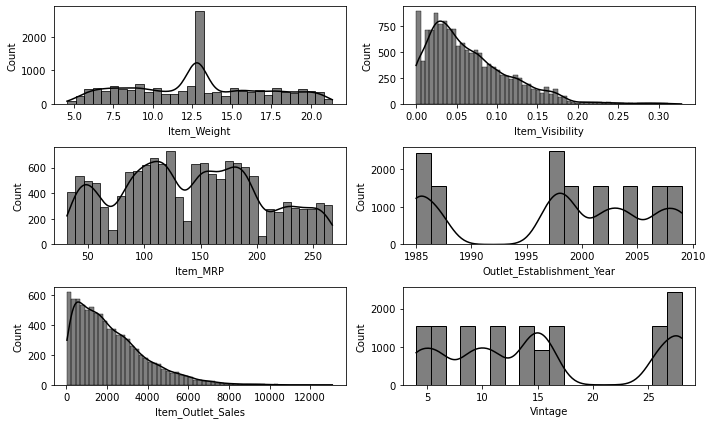

In [61]:
n_rows=3
n_cols=2
counter=1

plt.rcParams['figure.figsize']=[10,6]
for i in nums:
    plt.subplot(n_rows,n_cols,counter)
    sns.histplot(data.loc[:,i],kde=True,color='black')
    counter+=1

plt.tight_layout()
plt.show()


## INFERENCE

* Item Outlet Sales in positively skewed in nature
* No pattern seen in outlet year
* Item Mrp has multimodel nature
* Item_Visibility is positively skewed 

In [62]:
cat = data.select_dtypes(include = object).columns
cat

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_ID_Cat',
       'Item_Type_Perish', 'performing'],
      dtype='object')

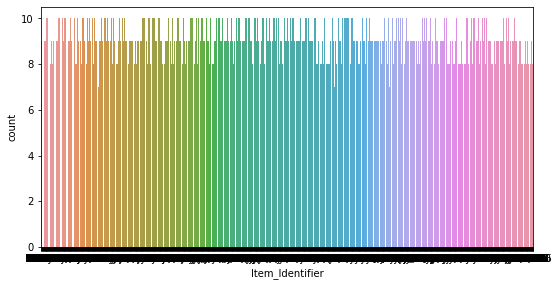

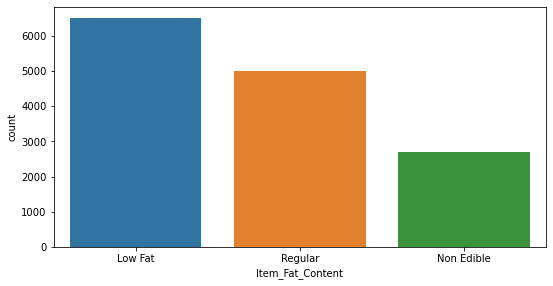

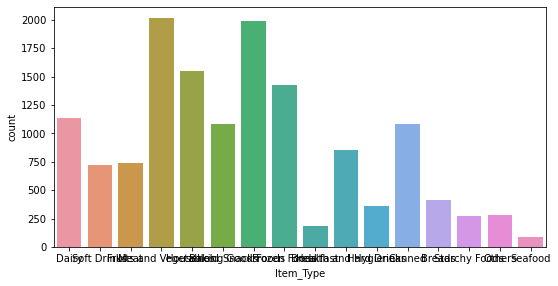

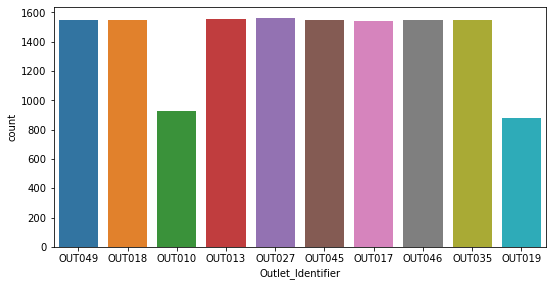

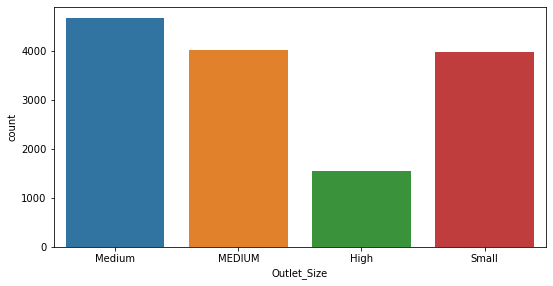

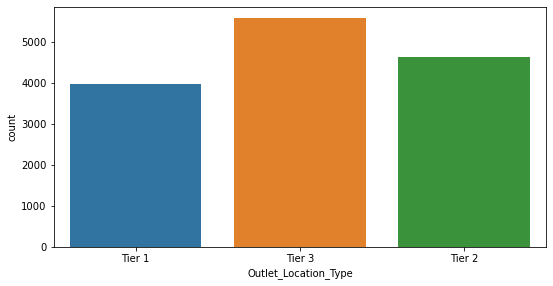

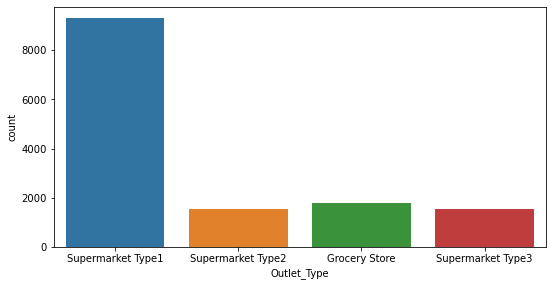

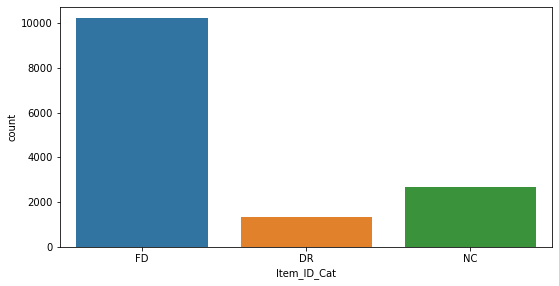

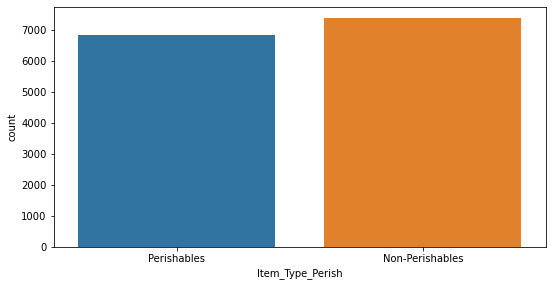

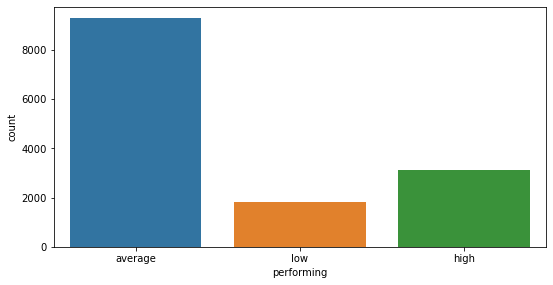

In [63]:
counter = 1
for i in cat:
    plt.figure(figsize=(30,15))
    plt.subplot(3,3,counter)
    sns.countplot(data[i])
    plt.show()

In [64]:
# replace LF reg and low fat into resp catgories...
data.Item_Fat_Content.replace(to_replace=['LF','reg','low fat'],value=['Low Fat','Regular','Low Fat'],inplace=True)

In [65]:
data['Item_Type'].value_counts().head()

Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Name: Item_Type, dtype: int64

## INFERENCE

* We realized that this store is mostly opened in tier03 cities and the type of outlet is medium size outlet the items that are sold in the outlet are fruits and vegetables,snacks,frozen, Household followed by dairy
* lowest performing outlets - out10 and out19
* s1 appears to be the most commonly seen outlet across the locations

# BIVARIATE ANALYSIS

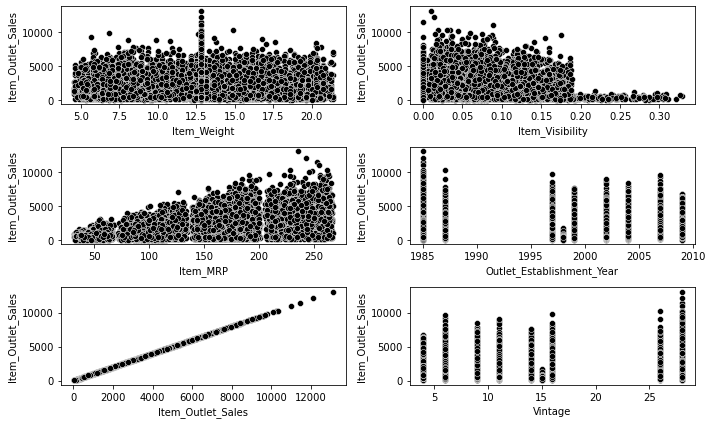

In [66]:
n_rows=3
n_cols=2
counter=1

plt.rcParams['figure.figsize']=[10,6]
for i in nums:
    plt.subplot(n_rows,n_cols,counter)
    sns.scatterplot(i,'Item_Outlet_Sales',data=data,color='black')
    counter+=1

plt.tight_layout()
plt.show()

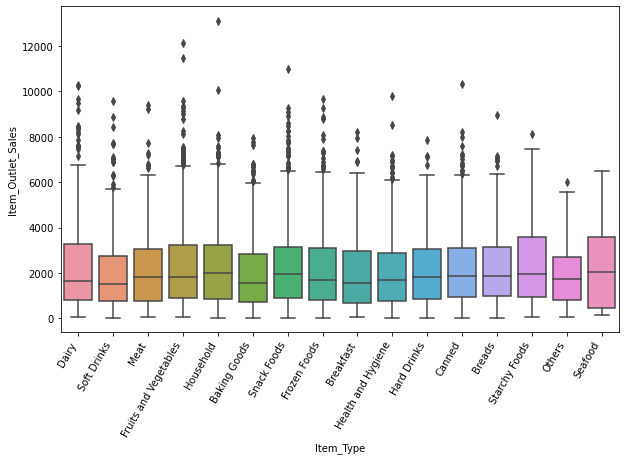

In [67]:
#Cat vs num

#Item_Type vs Sales
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=data)
plt.xticks(rotation=60,ha='right')
plt.show()

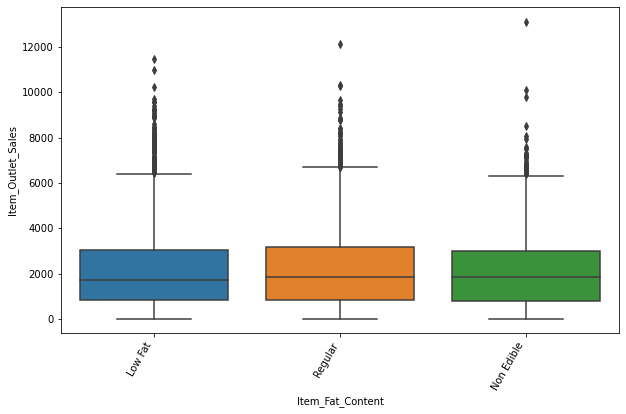

In [68]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=data)
plt.xticks(rotation=60,ha='right')
plt.show()

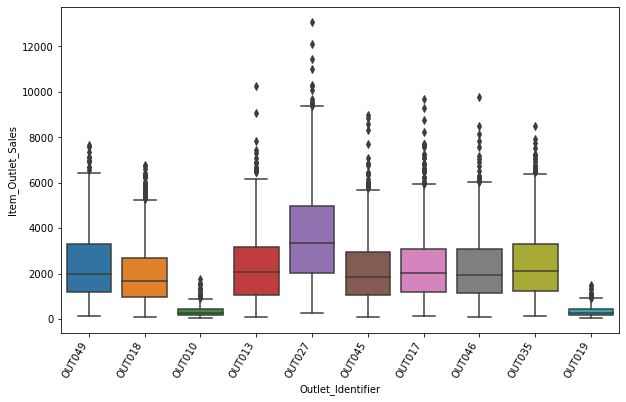

In [69]:
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=data)
plt.xticks(rotation=60,ha='right')
plt.show()

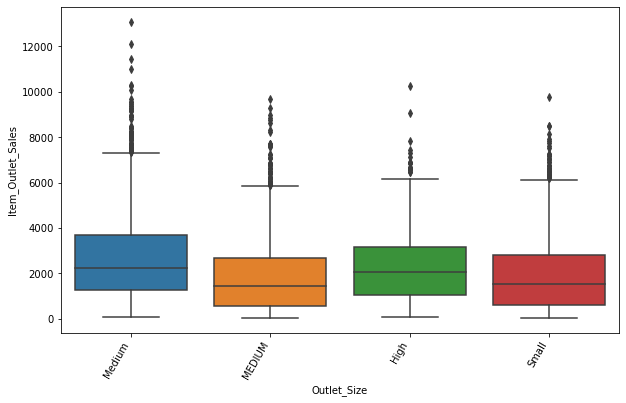

In [70]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=data)
plt.xticks(rotation=60,ha='right')
plt.show()

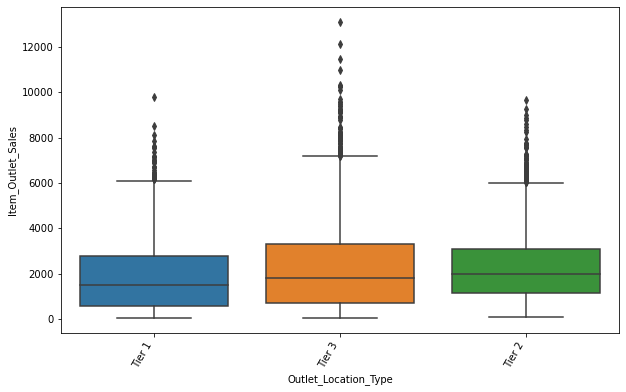

In [71]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=data)
plt.xticks(rotation=60,ha='right')
plt.show()

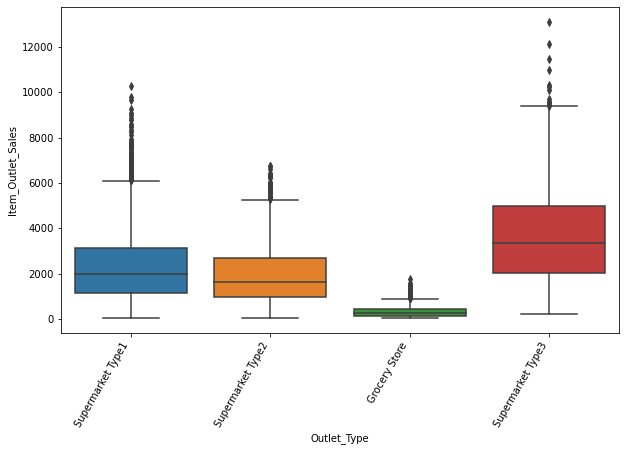

In [72]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=data)
plt.xticks(rotation=60,ha='right')
plt.show()

## Bivariate Summary for cat vs num
* Fruits and vegetable, and Household items have the highest outlet sales
* Low Fat items have a slightly higher outlet Sales than Regular item sales
* Medium Scale outlets generate more revenue
* tier 3 cities have a considerably higher sales than other tiers
* Supermarket type3 have the highest outlet sales while Grocery stores have the lowest
* Most performing outlet is outlet 27

### FEATURE ENGINEERING 

In [73]:
lst=[]
for x in data['Item_Identifier']:
    lst.append(x[:2])

data['Item_ID_Cat']=lst

In [74]:
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Item_Type_Perish,performing,Vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,average,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishables,average,4


In [75]:
pd.crosstab(data.Item_ID_Cat,data.Item_Fat_Content)

Item_Fat_Content,Low Fat,Non Edible,Regular
Item_ID_Cat,,,
DR,1208,0,109
FD,5291,0,4910
NC,0,2686,0


In [76]:
data.loc[data['Item_ID_Cat']=='NC','Item_Fat_Content']='Non Edible'

In [77]:
data['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'Non Edible'], dtype=object)

In [78]:
data['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [79]:
perish = ['Dairy', 'Meat', 'Fruits and Vegetables', 'Snack Foods', 'Breakfast','Breads', 'Starchy Foods', 'Seafood']

In [80]:
def new_labels(x):
    if x in perish:
        return('Perishables')
    else:
        return('Non-Perishables')

In [81]:
data['Item_Type_Perish']=data['Item_Type'].apply(new_labels)

In [82]:
data.groupby('Outlet_Identifier')['Item_Outlet_Sales'].max().sort_values(ascending=False).index

Index(['OUT027', 'OUT013', 'OUT046', 'OUT017', 'OUT045', 'OUT035', 'OUT049',
       'OUT018', 'OUT010', 'OUT019'],
      dtype='object', name='Outlet_Identifier')

In [83]:
low=['OUT010','OUT019']
high=['OUT027','OUT013']
average=['OUT046', 'OUT017', 'OUT045', 'OUT035', 'OUT049','OUT018']

In [84]:
def high_average(x):
    if x in low:
        return 'low'
    elif x in average:
        return 'average'
    else:
        return 'high'

In [85]:
data['performing']=data['Outlet_Identifier'].apply(high_average)

In [86]:
data['Vintage']=2013 - data.Outlet_Establishment_Year

In [87]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Item_Type_Perish,performing,Vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,average,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishables,average,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,average,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,MEDIUM,Tier 3,Grocery Store,732.3800,FD,Perishables,low,15
4,NCD19,8.93,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non-Perishables,high,26


In [88]:
# dropping unnecessary columns

In [89]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_ID_Cat', 'Item_Type_Perish',
       'performing', 'Vintage'],
      dtype='object')

In [90]:
newdata = data.drop(['Item_Identifier','Item_Type','Outlet_Identifier',
       'Outlet_Establishment_Year',], axis = 1)

In [91]:
newdata

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Item_Type_Perish,performing,Vintage
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,average,14
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishables,average,4
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,average,14
3,19.20,Regular,0.000000,182.0950,MEDIUM,Tier 3,Grocery Store,732.3800,FD,Perishables,low,15
4,8.93,Non Edible,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non-Perishables,high,26
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,Regular,0.013496,141.3154,Small,Tier 1,Supermarket Type1,NaN,FD,Perishables,average,16
5677,7.60,Regular,0.142991,169.1448,Medium,Tier 3,Supermarket Type2,NaN,FD,Perishables,average,4
5678,10.00,Non Edible,0.073529,118.7440,MEDIUM,Tier 2,Supermarket Type1,NaN,NC,Non-Perishables,average,11
5679,15.30,Regular,0.000000,214.6218,MEDIUM,Tier 2,Supermarket Type1,NaN,FD,Non-Perishables,average,6


In [92]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           14204 non-null  float64
 1   Item_Fat_Content      14204 non-null  object 
 2   Item_Visibility       14204 non-null  float64
 3   Item_MRP              14204 non-null  float64
 4   Outlet_Size           14204 non-null  object 
 5   Outlet_Location_Type  14204 non-null  object 
 6   Outlet_Type           14204 non-null  object 
 7   Item_Outlet_Sales     8523 non-null   float64
 8   Item_ID_Cat           14204 non-null  object 
 9   Item_Type_Perish      14204 non-null  object 
 10  performing            14204 non-null  object 
 11  Vintage               14204 non-null  int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 1.9+ MB


In [46]:
# splitting train final data and test final data

In [47]:
#train_f = newdata[~(newdata['Item_Outlet_Sales'].isnull())]

In [48]:
#test_f = newdata[newdata['Item_Outlet_Sales'].isnull()]

<AxesSubplot:>

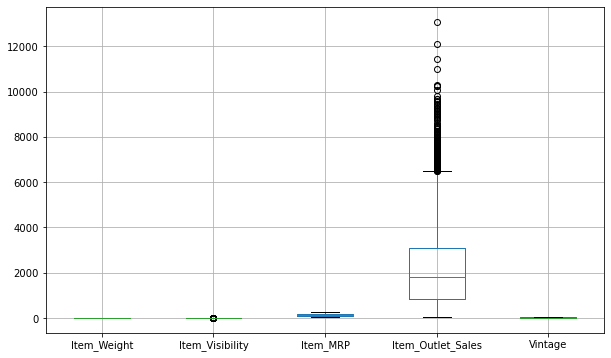

In [49]:
#train_f.boxplot()

<AxesSubplot:>

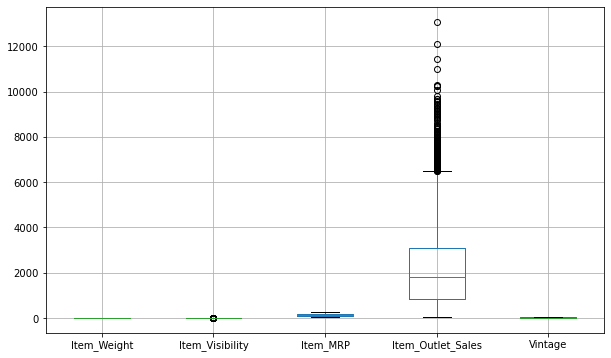

In [55]:
newdata.boxplot()

In [97]:
newdata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Item_Type_Perish,performing,Vintage
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,average,14
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishables,average,4
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,average,14
3,19.20,Regular,0.000000,182.0950,MEDIUM,Tier 3,Grocery Store,732.3800,FD,Perishables,low,15
4,8.93,Non Edible,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non-Perishables,high,26


In [99]:
# applying label encoding on the categorical columns (Outlet_Size,Outlet_Location_Type,Outlet_Type, performing)
# applying one hot encoding on the categorical columns (Item_Fat_Content,Item_ID_Cat,Item_Type_Perish)

In [100]:
le = LabelEncoder()
newdata['Outlet_Size'] = le.fit_transform(newdata['Outlet_Size'])
newdata['Outlet_Location_Type'] = le.fit_transform(newdata['Outlet_Location_Type'])
newdata['Outlet_Type'] = le.fit_transform(newdata['Outlet_Type'])
newdata['performing'] = le.fit_transform(newdata['performing'])

In [101]:
newdata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Item_Type_Perish,performing,Vintage
0,9.30,Low Fat,0.016047,249.8092,2,0,1,3735.1380,FD,Perishables,0,14
1,5.92,Regular,0.019278,48.2692,2,2,2,443.4228,DR,Non-Perishables,0,4
2,17.50,Low Fat,0.016760,141.6180,2,0,1,2097.2700,FD,Perishables,0,14
3,19.20,Regular,0.000000,182.0950,1,2,0,732.3800,FD,Perishables,2,15
4,8.93,Non Edible,0.000000,53.8614,0,2,1,994.7052,NC,Non-Perishables,1,26


In [110]:
newdata = pd.get_dummies(newdata, drop_first = True)

In [111]:
newdata.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,performing,Vintage,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_ID_Cat_FD,Item_ID_Cat_NC,Item_Type_Perish_Perishables
0,9.30,0.016047,249.8092,2,0,1,3735.1380,0,14,0,0,1,0,1
1,5.92,0.019278,48.2692,2,2,2,443.4228,0,4,0,1,0,0,0
2,17.50,0.016760,141.6180,2,0,1,2097.2700,0,14,0,0,1,0,1
3,19.20,0.000000,182.0950,1,2,0,732.3800,2,15,0,1,1,0,1
4,8.93,0.000000,53.8614,0,2,1,994.7052,1,26,1,0,0,1,0


In [122]:
# Splitting the data into train and test data

In [123]:
train_f = newdata[~(newdata['Item_Outlet_Sales'].isnull())]
test_f = newdata[newdata['Item_Outlet_Sales'].isnull()]

In [124]:
train_f.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,performing,Vintage,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_ID_Cat_FD,Item_ID_Cat_NC,Item_Type_Perish_Perishables
0,9.30,0.016047,249.8092,2,0,1,3735.1380,0,14,0,0,1,0,1
1,5.92,0.019278,48.2692,2,2,2,443.4228,0,4,0,1,0,0,0
2,17.50,0.016760,141.6180,2,0,1,2097.2700,0,14,0,0,1,0,1
3,19.20,0.000000,182.0950,1,2,0,732.3800,2,15,0,1,1,0,1
4,8.93,0.000000,53.8614,0,2,1,994.7052,1,26,1,0,0,1,0


In [125]:
test_f.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,performing,Vintage,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_ID_Cat_FD,Item_ID_Cat_NC,Item_Type_Perish_Perishables
0,20.750000,0.007565,107.8622,2,0,1,NaN,0,14,0,0,1,0,1
1,8.300000,0.038428,87.3198,1,1,1,NaN,0,6,0,1,1,0,1
2,14.600000,0.099575,241.7538,1,2,0,NaN,2,15,1,0,0,1,0
3,7.315000,0.015388,155.0340,1,1,1,NaN,0,6,0,0,1,0,1
4,12.792854,0.118599,234.2300,2,2,3,NaN,1,28,0,1,1,0,1


In [126]:
del test_f['Item_Outlet_Sales']

In [127]:
test_f.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,performing,Vintage,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_ID_Cat_FD,Item_ID_Cat_NC,Item_Type_Perish_Perishables
0,20.750000,0.007565,107.8622,2,0,1,0,14,0,0,1,0,1
1,8.300000,0.038428,87.3198,1,1,1,0,6,0,1,1,0,1
2,14.600000,0.099575,241.7538,1,2,0,2,15,1,0,0,1,0
3,7.315000,0.015388,155.0340,1,1,1,0,6,0,0,1,0,1
4,12.792854,0.118599,234.2300,2,2,3,1,28,0,1,1,0,1


In [129]:
print(train_f.shape, test_f.shape)

(8523, 14) (5681, 13)


In [134]:
# Train_test split of the train_f data
X = train_f.drop(columns=['Item_Outlet_Sales'])
X = sm.add_constant(X)
y = train_f['Item_Outlet_Sales']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 10)

In [135]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(6818, 14) (1705, 14) (6818,) (1705,)


### First Model (OLS)

In [136]:
model1 =  sm.OLS(y_train,X_train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Item_Outlet_Sales   R-squared:                       0.538
Model:                            OLS   Adj. R-squared:                  0.537
Method:                 Least Squares   F-statistic:                     659.8
Date:                Thu, 01 Sep 2022   Prob (F-statistic):               0.00
Time:                        17:31:22   Log-Likelihood:                -57767.
No. Observations:                6818   AIC:                         1.156e+05
Df Residuals:                    6805   BIC:                         1.156e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -1133.3525     99.521    -11.388      0.000   -1328.444    -938.261
Item_Weight                      0.5303      3.331      0.159      0.874      -6.000       7.061
Item_Visibility               -421.3390    284.939     -1.479      0.139    -979.909     137.231
Item_MRP                        15.4556      0.226     68.268      0.000      15.012      15.899
Outlet_Size                    -56.3850     22.373     -2.520      0.012    -100.242     -12.527
Outlet_Location_Type           107.8604     40.528      2.661      0.008      28.413     187.307
Outlet_Type                    542.1937     37.206     14.573      0.000     469.258     615.129
performing                    -977.9879     49.966    -19.573      0.000   -1075.938    -880.038
Vintage                         59.8346      3.563     16.792      0.000      52.849      66.820
Item_Fat_Content_Non Edible     -1.1726     28.495     -0.041      0.967     -57.032      54.687
Item_Fat_Content_Regular        32.0953     32.500      0.988      0.323     -31.615      95.806
Item_ID_Cat_FD                  37.8543     53.306      0.710      0.478     -66.643     142.351
Item_ID_Cat_NC                  -1.1726     28.495     -0.041      0.967     -57.032      54.687
Item_Type_Perish_Perishables     9.2388     33.497      0.276      0.783     -56.426      74.904
==============================================================================
Omnibus:                      787.904   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1724.744
Skew:                           0.707   Prob(JB):                         0.00
Kurtosis:                       5.018   Cond. No.                     1.70e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.67e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Text(0.5, 0, 'Skew: 0.71 Kurt: 2.02')

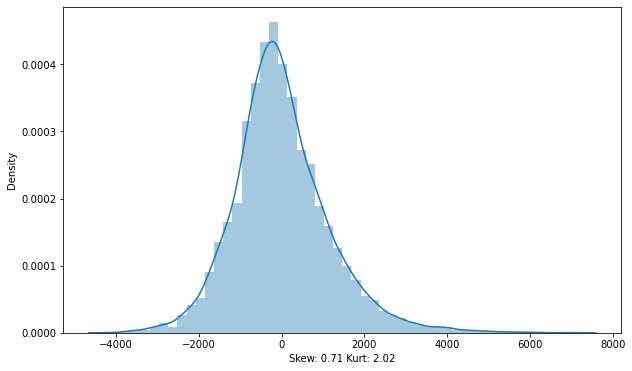

In [139]:
# according to the assumption of linear regression the residuals have to be normally distributed

sns.distplot(model1.resid)   # we see that the residual is not normally distributed
plt.xlabel('Skew: %.2f Kurt: %.2f'%(model1.resid.skew(),model1.resid.kurt()))

### Let's try some regularization methods

In [140]:
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

In [141]:
# removing the constant variable and splitting into train test

X.drop('const', axis = 1, inplace = True)

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size= 0.2, random_state= 10)

In [143]:
param = {'alpha':[0.01,0.1,1,10],
             'l1_ratio':[0,0.3,0.5,1]}

In [144]:
gscv = GridSearchCV(estimator=ElasticNet(),
                   param_grid=param,
                   scoring='r2',
                   verbose=3,
                   cv=3)

In [145]:
gscv.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END ............alpha=0.01, l1_ratio=0;, score=0.514 total time=   0.0s
[CV 2/3] END ............alpha=0.01, l1_ratio=0;, score=0.562 total time=   0.0s
[CV 3/3] END ............alpha=0.01, l1_ratio=0;, score=0.523 total time=   0.0s
[CV 1/3] END ..........alpha=0.01, l1_ratio=0.3;, score=0.514 total time=   0.0s
[CV 2/3] END ..........alpha=0.01, l1_ratio=0.3;, score=0.562 total time=   0.0s
[CV 3/3] END ..........alpha=0.01, l1_ratio=0.3;, score=0.523 total time=   0.0s
[CV 1/3] END ..........alpha=0.01, l1_ratio=0.5;, score=0.514 total time=   0.0s
[CV 2/3] END ..........alpha=0.01, l1_ratio=0.5;, score=0.562 total time=   0.0s
[CV 3/3] END ..........alpha=0.01, l1_ratio=0.5;, score=0.523 total time=   0.0s
[CV 1/3] END ............alpha=0.01, l1_ratio=1;, score=0.514 total time=   0.0s
[CV 2/3] END ............alpha=0.01, l1_ratio=1;, score=0.562 total time=   0.0s
[CV 3/3] END ............alpha=0.01, l1_ratio=1;

GridSearchCV(cv=3, estimator=ElasticNet(),
             param_grid={'alpha': [0.01, 0.1, 1, 10],
                         'l1_ratio': [0, 0.3, 0.5, 1]},
             scoring='r2', verbose=3)

In [146]:
gscv.best_score_

0.5331722072284067

#### Let us try Models with other algorithms

In [148]:
from sklearn.ensemble import AdaBoostRegressor,BaggingRegressor, GradientBoostingRegressor,RandomForestRegressor,StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error

### AdaBoost Model

In [149]:
# defining a user defined function to get the R2, AdjR2, MSE and RMSE

In [151]:
def model_results(model,x_train,y_train,x_test,y_test):
    print(str(model))
    n = x_train.shape[0]
    p = x_train.shape[1]
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    adj_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    print('R2 :\t',r2)
    print('Adj R2:\t',adj_r2)
    print('MSE:\t',mean_squared_error(y_test,y_pred))
    print('RMSE:\t',(mean_squared_error(y_test,y_pred))**0.5,'\n')

In [185]:
model_results(AdaBoostRegressor(n_estimators=100),X_train,y_train,X_test,y_test)

AdaBoostRegressor(n_estimators=100)
R2 :	 0.5054945591311364
Adj R2:	 0.504549736860223
MSE:	 1467895.7851239752
RMSE:	 1211.5674909488018 



In [187]:
# Lets tune the model a little using gridsearchCV

param = {'n_estimators': [200,250,300,350,400,450]}

gscv2 = GridSearchCV(estimator= AdaBoostRegressor(),
                    param_grid = param, 
                    scoring='r2',
                     n_jobs= -1,
                    cv = 3)

gscv2.fit(X_train,y_train)
gscv2.best_params_

{'n_estimators': 200}

In [188]:
# using the best parameter to build the AdaBoost model

model_results(AdaBoostRegressor(n_estimators=200),X_train,y_train,X_test,y_test)

AdaBoostRegressor(n_estimators=200)
R2 :	 0.5474091728166427
Adj R2:	 0.5465444343167334
MSE:	 1343475.9513281116
RMSE:	 1159.0841001964056 



### K Nearest Neighbors Algorithm

In [189]:
model_results(KNeighborsRegressor(n_neighbors=7), X_train,y_train,X_test,y_test)

KNeighborsRegressor(n_neighbors=7)
R2 :	 0.5260271610545386
Adj R2:	 0.5251215692105804
MSE:	 1406946.567319548
RMSE:	 1186.1477847720107 



In [190]:
# Lets tune the model a little using gridsearchCV

param = {'n_neighbors': [5,6,8,9,10]}

gscv3 = GridSearchCV(estimator= KNeighborsRegressor(),
                    param_grid = param, 
                    scoring='r2',
                     n_jobs= -1,
                    cv = 3)

gscv3.fit(X_train,y_train)
gscv3.best_params_

{'n_neighbors': 8}

In [191]:
# using the best parameter to build the KNeighborRegressor model

model_results(KNeighborsRegressor(**gscv3.best_params_),X_train,y_train,X_test,y_test)

KNeighborsRegressor(n_neighbors=8)
R2 :	 0.5306436156454877
Adj R2:	 0.5297468441880202
MSE:	 1393243.0290442894
RMSE:	 1180.357161644004 



### Gradient Boosting Algorithm

In [198]:
model_results(GradientBoostingRegressor(n_estimators=100,max_depth=5), X_train,y_train,X_test,y_test)

GradientBoostingRegressor(max_depth=5)
R2 :	 0.5835648707200656
Adj R2:	 0.5827692127717059
MSE:	 1236150.9510866595
RMSE:	 1111.8232553273292 



In [199]:
# Lets tune the model a little using gridsearchCV

param = {'n_estimators': [200,250,300,350,400],'max_depth':[4,6,7,8]}

gscv4 = GridSearchCV(estimator= GradientBoostingRegressor(),
                    param_grid = param, 
                    scoring='r2',
                     n_jobs= -1,
                    cv = 3)

gscv4.fit(X_train,y_train)
gscv4.best_params_

{'max_depth': 4, 'n_estimators': 200}

In [200]:
# using the best parameter to build the GradientBoostingRegressor model

model_results(GradientBoostingRegressor(**gscv4.best_params_),X_train,y_train,X_test,y_test)

GradientBoostingRegressor(max_depth=4, n_estimators=200)
R2 :	 0.589075103420355
Adj R2:	 0.5882899735474074
MSE:	 1219794.3113263457
RMSE:	 1104.4429869062258 



### Random Forest Algorithm

In [201]:
model_results(RandomForestRegressor(n_estimators=100, max_depth= 5,max_leaf_nodes=6), X_train,y_train,X_test,y_test)

RandomForestRegressor(max_depth=5, max_leaf_nodes=6)
R2 :	 0.5565170968366555
Adj R2:	 0.5556697603079777
MSE:	 1316439.8822067776
RMSE:	 1147.3621408285953 



In [202]:
# Lets tune the model a little using gridsearchCV

param = {'n_estimators': [200,250,300,350,400],'max_depth':[4,6,7,8], 'max_leaf_nodes':[4,5,7,8]}

gscv5 = GridSearchCV(estimator= RandomForestRegressor(),
                    param_grid = param, 
                    scoring='r2',
                     n_jobs= -1,
                    cv = 3)

gscv5.fit(X_train,y_train)
gscv5.best_params_

{'max_depth': 4, 'max_leaf_nodes': 8, 'n_estimators': 200}

In [204]:
# using the best parameter to build the RandomForestRegressor model

model_results(RandomForestRegressor(**gscv5.best_params_),X_train,y_train,X_test,y_test)

RandomForestRegressor(max_depth=4, max_leaf_nodes=8, n_estimators=200)
R2 :	 0.5826231153479335
Adj R2:	 0.5818256580433367
MSE:	 1238946.4688446468
RMSE:	 1113.079722591624 



### Decision Tree Algorithm

In [205]:
model_results(DecisionTreeRegressor(max_depth= 5,max_leaf_nodes=6), X_train,y_train,X_test,y_test)

DecisionTreeRegressor(max_depth=5, max_leaf_nodes=6)
R2 :	 0.5222355048141232
Adj R2:	 0.5213226684770543
MSE:	 1418201.7644396562
RMSE:	 1190.8827668749163 



In [206]:
# Lets tune the model a little using gridsearchCV

param = {'max_depth':[4,6,7,8,9,10], 'max_leaf_nodes':[4,5,7,8,9,10]}

gscv6 = GridSearchCV(estimator= DecisionTreeRegressor(),
                    param_grid = param, 
                    scoring='r2',
                     n_jobs= -1,
                    cv = 3)

gscv6.fit(X_train,y_train)
gscv6.best_params_

{'max_depth': 6, 'max_leaf_nodes': 10}

In [207]:
# using the best parameter to build the DecisionTreeRegressor model

model_results(DecisionTreeRegressor(**gscv6.best_params_),X_train,y_train,X_test,y_test)

DecisionTreeRegressor(max_depth=6, max_leaf_nodes=10)
R2 :	 0.5847575919210412
Adj R2:	 0.5839642128344705
MSE:	 1232610.4634012985
RMSE:	 1110.2299146579048 



### CatBoost Algorithm

In [229]:
model_results(CatBoostRegressor(iterations=100,learning_rate= 0.1), X_train,y_train,X_test,y_test)

0:	learn: 1611.7970088	total: 6.77ms	remaining: 670ms
1:	learn: 1536.0290793	total: 13.1ms	remaining: 644ms
2:	learn: 1467.8669564	total: 19ms	remaining: 613ms
3:	learn: 1408.9269887	total: 23.9ms	remaining: 573ms
4:	learn: 1358.0727156	total: 29.3ms	remaining: 557ms
5:	learn: 1313.7002592	total: 34.8ms	remaining: 545ms
6:	learn: 1276.7805320	total: 40.2ms	remaining: 535ms
7:	learn: 1243.5235056	total: 45.3ms	remaining: 521ms
8:	learn: 1218.3609627	total: 49.5ms	remaining: 500ms
9:	learn: 1193.9867653	total: 54.7ms	remaining: 493ms
10:	learn: 1174.8935305	total: 59.9ms	remaining: 485ms
11:	learn: 1157.7210274	total: 65.1ms	remaining: 477ms
12:	learn: 1143.5299615	total: 69.9ms	remaining: 468ms
13:	learn: 1132.6172851	total: 75.9ms	remaining: 466ms
14:	learn: 1122.3155494	total: 80.9ms	remaining: 458ms
15:	learn: 1113.8953167	total: 86.1ms	remaining: 452ms
16:	learn: 1107.5866024	total: 91.3ms	remaining: 446ms
17:	learn: 1101.7482863	total: 96.3ms	remaining: 439ms
18:	learn: 1096.683250

In [211]:
# Lets tune the model a little using gridsearchCV

param = {'iterations':[100,200,250,300,350,400], 'learning_rate':[0.1,0.001]}

gscv7 = GridSearchCV(estimator= CatBoostRegressor(),
                    param_grid = param, 
                    scoring='r2',
                     n_jobs= -1,
                    cv = 3)

gscv7.fit(X_train,y_train)
gscv7.best_params_

0:	learn: 1611.7970088	total: 4.92ms	remaining: 487ms
1:	learn: 1536.0290793	total: 9.71ms	remaining: 476ms
2:	learn: 1467.8669564	total: 13.9ms	remaining: 448ms
3:	learn: 1408.9269887	total: 18.3ms	remaining: 439ms
4:	learn: 1358.0727156	total: 22.6ms	remaining: 429ms
5:	learn: 1313.7002592	total: 27.1ms	remaining: 424ms
6:	learn: 1276.7805320	total: 31.3ms	remaining: 416ms
7:	learn: 1243.5235056	total: 35.3ms	remaining: 406ms
8:	learn: 1218.3609627	total: 38.9ms	remaining: 393ms
9:	learn: 1193.9867653	total: 43.3ms	remaining: 389ms
10:	learn: 1174.8935305	total: 47.6ms	remaining: 385ms
11:	learn: 1157.7210274	total: 51.8ms	remaining: 380ms
12:	learn: 1143.5299615	total: 56.1ms	remaining: 376ms
13:	learn: 1132.6172851	total: 60.3ms	remaining: 370ms
14:	learn: 1122.3155494	total: 64.3ms	remaining: 364ms
15:	learn: 1113.8953167	total: 68.3ms	remaining: 359ms
16:	learn: 1107.5866024	total: 72.4ms	remaining: 354ms
17:	learn: 1101.7482863	total: 76.5ms	remaining: 348ms
18:	learn: 1096.6832

{'iterations': 100, 'learning_rate': 0.1}

### XGBoost Algorithm

In [213]:
model_results(XGBRegressor(n_estimators=100,max_depth= 5), X_train,y_train,X_test,y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
R2 :	 0.5540617771553618
Adj R2:	 0.553209749392725
MSE:	 1323728.2821179503
RMSE:	 1150.533911763556 



In [214]:
# Lets tune the model a little using gridsearchCV

param = {'n_estimators':[200,250,300,350,400], 'max_depth':[6,7,8]}

gscv8 = GridSearchCV(estimator= XGBRegressor(),
                    param_grid = param, 
                    scoring='r2',
                     n_jobs= -1,
                    cv = 3)

gscv8.fit(X_train,y_train)
gscv8.best_params_

{'max_depth': 6, 'n_estimators': 200}

In [222]:
# using the best parameter to build the XGBRegressor model

model_results(XGBRegressor(**gscv8.best_params_),X_train,y_train,X_test,y_test)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)
R2 :	 0.4877577472200615
Adj R2:	 0.48677903627265706
MSE:	 1520545.946869532
RMSE:	 1233.1041914086304 



### LGBM Algorithm

In [216]:
model_results(LGBMRegressor(n_estimators=100), X_train,y_train,X_test,y_test)

LGBMRegressor()
R2 :	 0.5863140402715606
Adj R2:	 0.585523634998711
MSE:	 1227990.2837537776
RMSE:	 1108.147230179175 



In [219]:
param = {'n_estimators':[100,200,250,300,350,400]}

gscv9 = GridSearchCV(estimator= LGBMRegressor(),
                    param_grid = param, 
                    scoring='r2',
                     n_jobs= -1,
                    cv = 3)

gscv9.fit(X_train,y_train)
gscv9.best_params_

{'n_estimators': 100}

### Bagging Regressor

In [220]:
model_results(BaggingRegressor(n_estimators=100), X_train,y_train,X_test,y_test)

BaggingRegressor(n_estimators=100)
R2 :	 0.5613655276729754
Adj R2:	 0.5605274547540673
MSE:	 1302047.7429077758
RMSE:	 1141.0730664194014 



In [221]:
param = {'n_estimators':[100,200,250,300,350,400]}

gscv10 = GridSearchCV(estimator= BaggingRegressor(),
                    param_grid = param, 
                    scoring='r2',
                     n_jobs= -1,
                    cv = 3)

gscv10.fit(X_train,y_train)
gscv10.best_params_

{'n_estimators': 300}

In [223]:
# using the best parameter to build the BaggingRegressor model

model_results(BaggingRegressor(**gscv10.best_params_),X_train,y_train,X_test,y_test)

BaggingRegressor(n_estimators=300)
R2 :	 0.5661104763636674
Adj R2:	 0.5652814693373194
MSE:	 1287962.781230795
RMSE:	 1134.8844792448238 



### Stacking Regressor Algorithm

In [225]:
estimators = [('DT', DecisionTreeRegressor()),('KNN', KNeighborsRegressor()),('GB', GradientBoostingRegressor())]


model_results(StackingRegressor(estimators=estimators), 
                                X_train,y_train,X_test,y_test)

StackingRegressor(estimators=[('DT', DecisionTreeRegressor()),
                              ('KNN', KNeighborsRegressor()),
                              ('GB', GradientBoostingRegressor())])
R2 :	 0.6012292301688453
Adj R2:	 0.600467322466346
MSE:	 1183715.8580850135
RMSE:	 1087.9870670577907 



# Submission 

In [227]:
test_f.head()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,performing,Vintage,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Item_ID_Cat_FD,Item_ID_Cat_NC,Item_Type_Perish_Perishables
0,20.750000,0.007565,107.8622,2,0,1,0,14,0,0,1,0,1
1,8.300000,0.038428,87.3198,1,1,1,0,6,0,1,1,0,1
2,14.600000,0.099575,241.7538,1,2,0,2,15,1,0,0,1,0
3,7.315000,0.015388,155.0340,1,1,1,0,6,0,0,1,0,1
4,12.792854,0.118599,234.2300,2,2,3,1,28,0,1,1,0,1


In [228]:
# using CatBoost Model as final model as the RMSE is 1074, which is lowest among all

In [231]:
catmod = CatBoostRegressor(iterations=100,learning_rate= 0.1)
model_f = catmod.fit(X_train,y_train)
print(model_f.score(X_test,y_test))


0:	learn: 1611.7970088	total: 4.69ms	remaining: 464ms
1:	learn: 1536.0290793	total: 9.01ms	remaining: 441ms
2:	learn: 1467.8669564	total: 14ms	remaining: 453ms
3:	learn: 1408.9269887	total: 19.4ms	remaining: 464ms
4:	learn: 1358.0727156	total: 24.5ms	remaining: 465ms
5:	learn: 1313.7002592	total: 30.5ms	remaining: 478ms
6:	learn: 1276.7805320	total: 35.6ms	remaining: 472ms
7:	learn: 1243.5235056	total: 41.2ms	remaining: 474ms
8:	learn: 1218.3609627	total: 45.3ms	remaining: 458ms
9:	learn: 1193.9867653	total: 50.3ms	remaining: 453ms
10:	learn: 1174.8935305	total: 56ms	remaining: 453ms
11:	learn: 1157.7210274	total: 61.4ms	remaining: 450ms
12:	learn: 1143.5299615	total: 67.2ms	remaining: 450ms
13:	learn: 1132.6172851	total: 73ms	remaining: 449ms
14:	learn: 1122.3155494	total: 78.5ms	remaining: 445ms
15:	learn: 1113.8953167	total: 83.5ms	remaining: 438ms
16:	learn: 1107.5866024	total: 88.8ms	remaining: 434ms
17:	learn: 1101.7482863	total: 94.3ms	remaining: 430ms
18:	learn: 1096.6832502	to

In [232]:
y_pred_test_f = model_f.predict(test_f) 

In [233]:
y_pred_test_f

array([1681.21020719, 1415.79871315,  528.87416855, ..., 1901.33198894,
       3825.0901294 , 1225.74389434])

In [234]:
y_test_f = pd.DataFrame(y_pred_test_f)

In [235]:
y_test_f.to_csv('BMSale_Pred.csv')